In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [3]:
#load in the data
import os 
os.getcwd()
os.chdir('/Users/rdhir/Documents/maxpreps-data-analysis/Data')

In [4]:
df = pd.read_csv('final_data_target.csv').drop(columns=['Date'])
df.dropna(inplace=True)

In [5]:
# Define features and targets
features = ['Team 1 SOS', 'Team 1 American Indian/Alaska Native', 'Team 1 Asian or Asian/Pacific Islander',
            'Team 1 Hispanic', 'Team 1 Black', 'Team 1 White',
            'Team 1 Nat. Hawaiian or Other Pacific Isl.', 'Team 1 Two or More Races',
            'Team 1 Grades 9-12 Students', 'Team 1 Free and Reduced Lunch',
            'Team 1 Pupil/Teacher Ratio', 'Team 1 Charter School', 'Team 1 Magnet School',
            'Team 1 Private School', 'Team 1 Total Expenditures per Pupil']

target1 = df['MV avg']
target2 = df['Win Percentage']
X = df[features]

In [6]:
# Split data into train and test sets for MV avg
X_train_mv, X_test_mv, y_train_mv, y_test_mv = train_test_split(X, target1, test_size=0.2, random_state=42)

# Split data into train and test sets for Win Percentage
X_train_wp, X_test_wp, y_train_wp, y_test_wp = train_test_split(X, target2, test_size=0.2, random_state=42)


In [7]:
# Initialize the model
model_mv = LinearRegression()
model_wp = LinearRegression()

# Train the model for MV avg
model_mv.fit(X_train_mv, y_train_mv)

# Train the model for Win Percentage
model_wp.fit(X_train_wp, y_train_wp)


LinearRegression()

In [8]:
# Make predictions for MV avg
y_pred_mv = model_mv.predict(X_test_mv)

# Make predictions for Win Percentage
y_pred_wp = model_wp.predict(X_test_wp)

In [9]:
# Evaluate the model for MV avg
mse_mv = mean_squared_error(y_test_mv, y_pred_mv)
rmse_mv = np.sqrt(mse_mv)
r2_mv = r2_score(y_test_mv, y_pred_mv)

print(f'MV avg - Mean Squared Error: {mse_mv}')
print(f'MV avg - Root Mean Squared Error: {rmse_mv}')
print(f'MV avg - R-squared: {r2_mv}')

# Evaluate the model for Win Percentage
mse_wp = mean_squared_error(y_test_wp, y_pred_wp)
rmse_wp = np.sqrt(mse_wp)
r2_wp = r2_score(y_test_wp, y_pred_wp)

print(f'Win Percentage - Mean Squared Error: {mse_wp}')
print(f'Win Percentage - Root Mean Squared Error: {rmse_wp}')
print(f'Win Percentage - R-squared: {r2_wp}')


MV avg - Mean Squared Error: 150.99748708630602
MV avg - Root Mean Squared Error: 12.288103478011
MV avg - R-squared: 0.04179223276686028
Win Percentage - Mean Squared Error: 0.05108124470061402
Win Percentage - Root Mean Squared Error: 0.22601160302208828
Win Percentage - R-squared: 0.04163684701781045


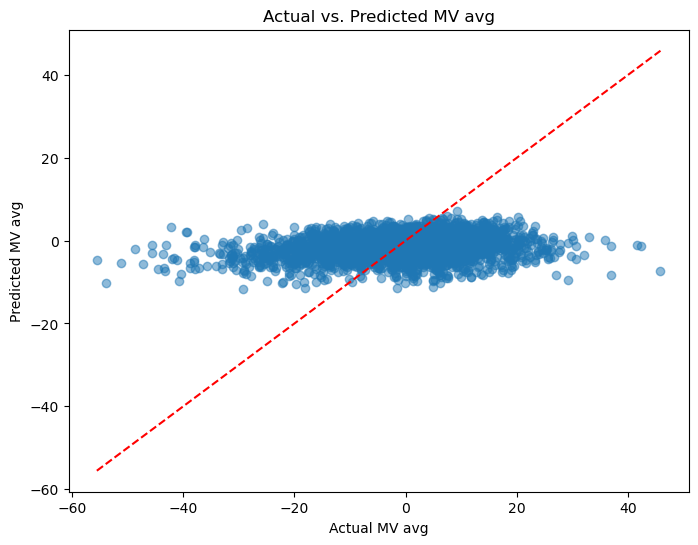

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_mv, y_pred_mv, alpha=0.5)
plt.xlabel('Actual MV avg')
plt.ylabel('Predicted MV avg')
plt.title('Actual vs. Predicted MV avg')
plt.plot([min(y_test_mv), max(y_test_mv)], [min(y_test_mv), max(y_test_mv)], color='red', linestyle='--')  # Reference line
plt.show()

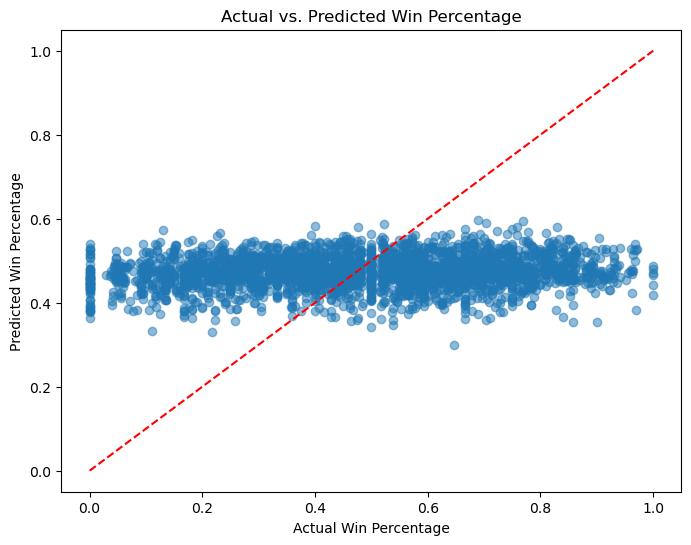

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_wp, y_pred_wp, alpha=0.5)
plt.xlabel('Actual Win Percentage')
plt.ylabel('Predicted Win Percentage')
plt.title('Actual vs. Predicted Win Percentage')
plt.plot([min(y_test_wp), max(y_test_wp)], [min(y_test_wp), max(y_test_wp)], color='red', linestyle='--')  # Reference line
plt.show()